In [22]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


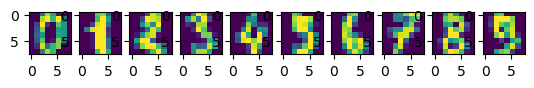

In [23]:

digits = load_digits()

#print(digits)

fig = plt.figure()

for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(digit)
    
plt.show()


In [5]:

# setup features && target
X, y = digits.data, digits.target

clf = tree.DecisionTreeClassifier()

# train model
clf.fit(X, y)

accuracy = clf.score(X, y)

print(accuracy)



1.0


In [14]:

# 90% data for test, 10% for learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

Z = clf.predict(X_test)

accuracy = clf.score(X_test,y_test)

print(accuracy)


0.69221260815822


In [15]:

# Construction de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test

N = 100
accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

# L'on peut conclure que les arbres de décision produisent des classifieurs avec un taux d’erreur qui n’est pas très stable


0.8555555555555555
0.9222222222222223
0.8777777777777778
0.8666666666666667
0.8666666666666667
0.9
0.7666666666666667
0.8555555555555555
0.8666666666666667
0.8555555555555555
0.8555555555555555
0.8888888888888888
0.8555555555555555
0.8666666666666667
0.8444444444444444
0.8444444444444444
0.7666666666666667
0.9
0.8444444444444444
0.8666666666666667
0.8333333333333334
0.8888888888888888
0.8333333333333334
0.8777777777777778
0.8333333333333334
0.9555555555555556
0.8555555555555555
0.8888888888888888
0.8777777777777778
0.8777777777777778
0.8555555555555555
0.8666666666666667
0.8888888888888888
0.8444444444444444
0.8222222222222222
0.8111111111111111
0.8444444444444444
0.8555555555555555
0.9222222222222223
0.8777777777777778
0.8666666666666667
0.8666666666666667
0.8777777777777778
0.8555555555555555
0.8444444444444444
0.7888888888888889
0.8333333333333334
0.8888888888888888
0.8444444444444444
0.8222222222222222
0.8444444444444444
0.8111111111111111
0.7777777777777778
0.8666666666666667
0.86

In [17]:

# Construction avec un classifieur bagging 

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

clf.fit(X_train, y_train)

Z = clf.predict(X_test)

accuracy = clf.score(X_test,y_test)

print(accuracy)


0.9888888888888889


In [19]:

# Construction de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test

N = 100
accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

# L'on peut conclure que le classifieur est meilleur et plus stable



1.0
0.9333333333333333
0.9888888888888889
1.0
0.9777777777777777
0.9777777777777777
0.9666666666666667
0.9888888888888889
0.9777777777777777
0.9666666666666667
0.9555555555555556
0.9888888888888889
0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9555555555555556
0.9888888888888889
0.9888888888888889
0.9555555555555556
0.9222222222222223
0.9333333333333333
0.9666666666666667
0.9777777777777777
0.9666666666666667
0.9666666666666667
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9888888888888889
0.9888888888888889
0.9555555555555556
0.9555555555555556
0.9888888888888889
0.9666666666666667
0.9666666666666667
0.9777777777777777
0.9777777777777777
0.9888888888888889
0.9777777777777777
0.9666666666666667
0.9777777777777777
1.0
1.0
0.9777777777777777
0.9666666666666667
0.9777777777777777
0.9777777777777777
0.9888888888888889
0.9777777777777777
0.9555555555555556
0.9888888888888889
0.9555555555555

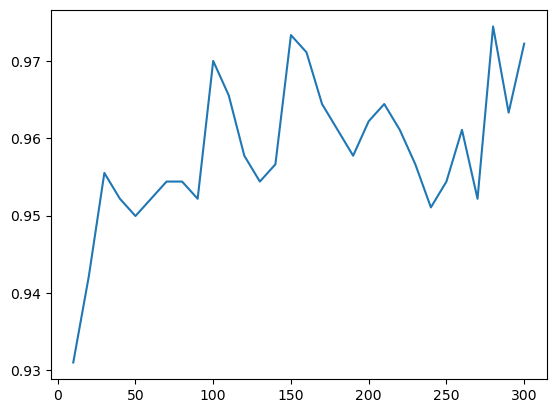

In [21]:

# Graphique accuracy vs n_estimators

N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

# Le taux d’erreur diminue avec n_estimators, mais à partir d’une valeur il se stabilise, donc on ne gagne rien à partir de cette valeur de n_estimators, si ce n’est que l’algorithme devient plus lent


In [24]:

# Variation des paramètres max_samples et max_features

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

params_grid = { 'max_samples': [0.2, 0.4, 0.6, 0.8], 'max_features': [0.2, 0.4, 0.6, 0.8] }

grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=params_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Meilleur score : ' + str(grid_search.best_estimator_.score(X_test, y_test)))
print('max_samples: ' + str(grid_search.best_estimator_.max_samples))
print('max_features: ' + str(grid_search.best_estimator_.max_features))



Meilleur score : 0.9443826473859844
max_samples: 0.8
max_features: 0.8


In [27]:

#### ---- ---- RANDOM FOREST ---- ---- ####

from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print(accuracy)


0.9048207663782447


In [28]:

# Comparaison de la variable accuracy avec DecisionTreeClassifier / BaggingClassifier / RandomForestClassifier

def displayAccuracy(message):
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    print(message + ' : ' + str(clf.score(X_test, y_test)))

clf = tree.DecisionTreeClassifier()
displayAccuracy('Arbre de décision')

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
displayAccuracy('Bagging (200 arbres)')

clf = RandomForestClassifier(n_estimators=200)
displayAccuracy('Forêt aléatoire (200 arbres)')



Arbre de décision : 0.7095179233621756
Bagging (200 arbres) : 0.8782447466007417
Forêt aléatoire (200 arbres) : 0.9035846724351051


In [29]:

# Construction de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test pour bagging

N = 10
bagging_accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


0.9372636262513906 0.012964451420986393


In [30]:

# Construction de la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test pour random forest

rf_accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

# Variance et taux d'erreurs plus faible avec random forest 


0.9602892102335927 0.006893860036639025


10 0.9432703003337041
20 0.949944382647386
30 0.967741935483871
40 0.9632925472747497
50 0.9632925472747497
60 0.9688542825361512
70 0.9666295884315906
80 0.978865406006674
90 0.9710789766407119
100 0.9744160177975528
110 0.9699666295884316
120 0.9755283648498332
130 0.9733036707452726
140 0.9744160177975528
150 0.9710789766407119
160 0.9733036707452726
170 0.9777530589543938
180 0.9733036707452726
190 0.9755283648498332
200 0.9744160177975528
210 0.9744160177975528
220 0.9721913236929922
230 0.9710789766407119
240 0.9766407119021134
250 0.9744160177975528
260 0.9710789766407119
270 0.9755283648498332
280 0.9721913236929922
290 0.9710789766407119
300 0.9744160177975528


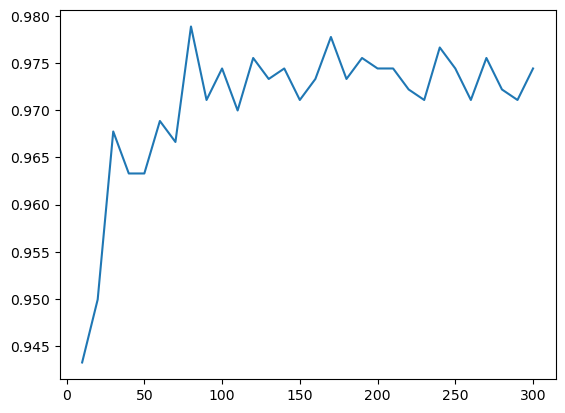

In [31]:

# Graphique accuracy vs n_estimators

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

# À partir de n_estimators = 50 le résultat commence à osciller autour de la moyenne et donc l'on ne gagne plus rien en augmentant la valeur


In [33]:

# Test des Extra-Trees 

from sklearn.ensemble import ExtraTreesClassifier

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

def displayAccuracy(message):
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(message + ' : ' + str(accuracy))
    
clf = RandomForestClassifier(n_estimators=50)
displayAccuracy('Forêt aléatoire')

clf = ExtraTreesClassifier(n_estimators=50)
displayAccuracy('Extra Trees')


Forêt aléatoire : 0.9599555061179088
Extra Trees : 0.967741935483871


In [35]:

# BOOSTING 

from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)


0.8838071693448702


In [39]:

# Variation des paramètres 

for x in [2, 3, 4, 5, 10, 15]:
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=x), n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print('Accuracy with max_depth = ' + str(x) + ': ' + str(accuracy))

# max_depth faible génère des arbres peu profonds qui ont tendance à mal généraliser 
# max_dept élevé génère des arbres trop profonds (overfitting) et donc aussi une mauvaise généralisation


Accuracy with max_depth = 2: 0.6248454882571075
Accuracy with max_depth = 3: 0.8745364647713226
Accuracy with max_depth = 4: 0.8868974042027195
Accuracy with max_depth = 5: 0.8899876390605687
Accuracy with max_depth = 10: 0.6792336217552534
Accuracy with max_depth = 15: 0.6829419035846724


In [41]:

for x in [30, 300]:
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=x, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print('Accuracy with n_estimators = ' + str(x) + ': ' + str(accuracy))

# un classifieur faible (ex : max_depth = 2) peut être compensé par un paramètre n_estimators plus grand
    

Accuracy with n_estimators = 30: 0.7472187886279357
Accuracy with n_estimators = 300: 0.8436341161928307


In [44]:

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

for x in [2, 0.1]:
    clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=x)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print('Accuracy with learning_rate = ' + str(x) + ': ' + str(accuracy))


Accuracy with learning_rate = 2: 0.9134734239802225
Accuracy with learning_rate = 0.1: 0.8096415327564895
